# Python for STEM - Week 2 (Advanced)  

## Day 4 - Part 1: Supervised learning - Regression

In this notebook, we will focus on examples of supervised machine learning. More specifically, we will be doing regression using Scikit-learn, one of the machine learning packages in Python. Before we start, here we first import all the packages that we need for this notebook. 

All the machine learning functions we will use in Day 3 and Day 4 all comes from [scikit-learn](https://scikit-learn.org/stable/index.html). You can find very detailed descriptions on many machine learning models included in the package user guide and various examples. This would be a good place to start when you want to adopt machine learning for your own research/work.  




In [ ]:
## In this cell, we import all the packages needed for this notebook
import numpy as np                  ## packages for data handling
import pandas as pd                 
import matplotlib.pyplot as plt     ## packages for visualization 
import seaborn as sbn 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Ingest

In this notebook, we will be using another real world problem of predictive modeling of the concentration of PM2.5 in Beijing using hourly weather information. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 $\mu m$. The data is between 2010 and 2014. The data is stored as a comma separated value (CSV) data file, with 11 columns. The table below shows the meaning of each column.  

| Variable name | Full name |
|-:|-:|
|*year*|Year of observation| 
|*month*|Month of observation|
|*day*|Day of observation|
|*hour*|Hour of observation|
|*pm2.5*|Concentration of PM 2.5 ($\mu g/m^3$)|
|*DEWP*|Dew Point ($^\circ C$)|
|*TEMP*|Temperature ($^\circ C$)|
|*PRES*|Pressure (hPa)|
|*WIND*|Wind speed (m/s)|
|*TSNOW*|Continuos hours of snow|
|*TRAIN*|Continuos hours of rain|

In [ ]:
filename = "https://raw.githubusercontent.com/uofscphysics/STEM_Python_Course/Summer2020/02_Week2/Data/04_Beijing_PM2.5_hourly_20100101-20141231.csv"
PMdata = pd.read_csv(filename, index_col=None)
print( PMdata.head() )
print( PMdata.shape )

## We see there are mission values at the begining so we drop these missing 
## values in the dataset
PMdata = PMdata.dropna()
print( PMdata.head() )

   year  month  day  hour  pm2.5  DEWP  TEMP    PRES   WIND  TSNOW  TRAIN
0  2010      1    1     0    NaN   -21 -11.0  1021.0   1.79      0      0
1  2010      1    1     1    NaN   -21 -12.0  1020.0   4.92      0      0
2  2010      1    1     2    NaN   -21 -11.0  1019.0   6.71      0      0
3  2010      1    1     3    NaN   -21 -14.0  1019.0   9.84      0      0
4  2010      1    1     4    NaN   -20 -12.0  1018.0  12.97      0      0
(43824, 11)
    year  month  day  hour  pm2.5  DEWP  TEMP    PRES  WIND  TSNOW  TRAIN
24  2010      1    2     0  129.0   -16  -4.0  1020.0  1.79      0      0
25  2010      1    2     1  148.0   -15  -4.0  1020.0  2.68      0      0
26  2010      1    2     2  159.0   -11  -5.0  1021.0  3.57      0      0
27  2010      1    2     3  181.0    -7  -5.0  1022.0  5.36      1      0
28  2010      1    2     4  138.0    -7  -5.0  1022.0  6.25      2      0


In [ ]:
## Since we will not use the time information for modeling, we here only keep
## pm2.5 and weather information
PMdata = PMdata.iloc[:,4:]
print ( PMdata.head() )

    pm2.5  DEWP  TEMP    PRES  WIND  TSNOW  TRAIN
24  129.0   -16  -4.0  1020.0  1.79      0      0
25  148.0   -15  -4.0  1020.0  2.68      0      0
26  159.0   -11  -5.0  1021.0  3.57      0      0
27  181.0    -7  -5.0  1022.0  5.36      1      0
28  138.0    -7  -5.0  1022.0  6.25      2      0


Now we can look at the time-series of our data.

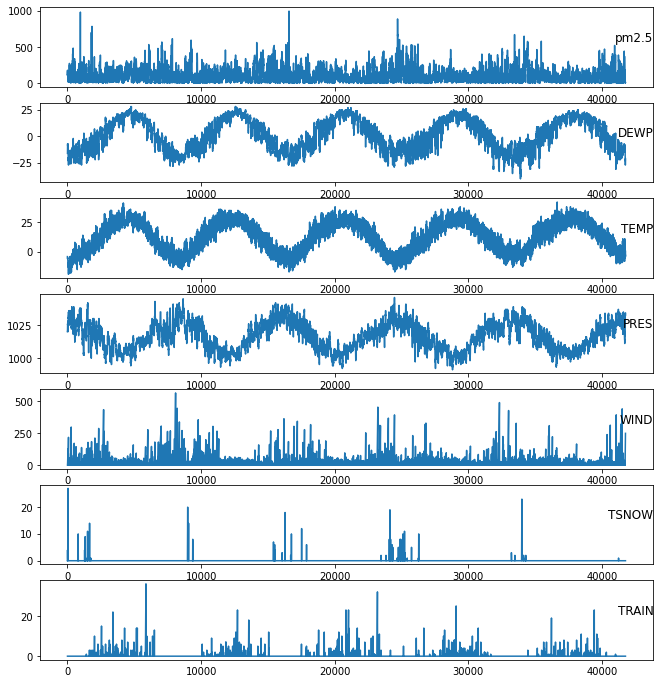

In [ ]:
# specify columns to plot
index = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plotting each column
plt.figure(figsize=(11, 12))
for ind in index:
	plt.subplot(len(index), 1, i)
	plt.plot(PMdata.iloc[:, ind].values)
	plt.title(PMdata.columns[ind], y=0.5, loc='right')
	i += 1
plt.show()

## Data Scaling  

From the data, we see there are large differences of the magnitude of different variables, which can cause issues when we directly build our model with current data. Data with notably larger magnitude could dominate the model performance. To avoid that, we usually scale our data to [0, 1], or [-1, 1]. In other cases, we can also scale all variables to a distribution with 0 mean and standard deviation of 1.  

In [ ]:
## import function to perform data scaling
from sklearn.preprocessing import MinMaxScaler

## scale the data


In [ ]:
## After scaling our data, we can separate the data into training and testing data
from sklearn.model_selection import train_test_split

## Independent variables for our model (weather data) 

## Target output for our model (pm2.5)

## We are spliting our data set into training and testing sets based on a 60:40 ratio



## Decision tree regression

As the basis of the random forest, we will try to fit a decision tree model for regression first and visualize the model to have a better understanding of the model structure, and why it is called a "decision tree".

In [ ]:
## Import the decision tree model
from sklearn.tree import DecisionTreeRegressor

## define our model

## fit our model with .fit and our training data


In [ ]:
## We can now visualize what a decision tree looks like
## Because we have a really big tree, so let's try text representation first
from sklearn import tree


In [ ]:
## We can further visualize the tree structure using plot_tree function


In [ ]:
## How does our decision tree model perform on modeling the PM2.5 data?
## We can check the root mean squre error for our model

## import metric for regression model performance



In [ ]:
## To show the prediction results, we can also plot a kernal density plot between 
## predicted value and testing value


It appears that the decision tree model can be improved. How about let's try the random forest model and see if the random forest can improve the performance.

## Random Forest

This time, we are fitting a random forest regression model instead of classification. The concept is similar with the classifier, but we are using the regressor function instead.

In [ ]:
## import randomforest regressor from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## Let's first define our model parameter grids


# Initialize a stratified 5-fold generator for the cross-validation.

## Define the model and use min_samples_leaf=15 same as the decision tree

## Define the grid search object


In [ ]:

## Now we can fit the optimum model for the random forest

## predict the testing data


## Get the root mean square error of the prediction


In [ ]:
## To show the prediction results, we can also plot a kernal density plot between 
## predicted value and testing value


In [ ]:
## We can also compare the model error between decision tree and random forest
## and see the performance differences.


Right now, we are spliting the data randomly into training and testing. There is another possibility of data spliting, which is based on time. Since we want to make sure the training data capture the seasonal cycle within our data, we can use the first three years of data (2010-2012) to build up our model and use the remaining two years of data (2013-2014) to evaluate the model performance.

This will be our group exercise to do so.

In [ ]:
index = 365*24*3 ## total data poitns within three years.

X_train_time = scaled[:index, 1:]
X_test_time = scaled[index:, 1:]
y_train_time = scaled[:index, 0]
y_test_time = scaled[index:, 0]

print( X_train_time.shape, y_train_time.shape )

In [ ]:
## Here we will be repeating the same random forest procedure
## Let's first define our model parameter grids


# Initialize a stratified 5-fold generator for the cross-validation.

## Define the model 

## Define the grid search object

## calculate the model performance with RMSE
